In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
df=pd.read_csv("Prostate_cancer .csv")

In [32]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12.0,NaN,954,0.143,0.278,0.242,0.079
1,2,B,9,13.0,133.0,1326,0.143,0.079,0.181,0.057
2,3,M,21,27.0,130.0,1203,0.125,0.160,0.207,0.060
3,4,M,14,16.0,78.0,386,0.070,0.284,0.260,0.097
4,5,M,9,19.0,135.0,1297,0.141,0.133,0.181,0.059


In [33]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,99.000000,99.000000,100.000000,99.000000,99.000000,99.000000,99.000000
mean,50.500000,16.850000,18.303030,96.232323,702.880000,0.102566,0.126313,0.192697,0.064596
std,29.011492,4.879094,5.167509,23.151157,319.710895,0.014623,0.061332,0.030574,0.008138
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.000000,476.750000,0.093000,0.080000,0.172000,0.059000
50%,50.500000,17.000000,18.000000,94.000000,644.000000,0.102000,0.116000,0.190000,0.063000
75%,75.250000,21.000000,22.500000,113.500000,917.000000,0.111500,0.155500,0.208500,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            99 non-null     float64
 4   perimeter          99 non-null     float64
 5   area               100 non-null    int64  
 6   smoothness         99 non-null     float64
 7   compactness        99 non-null     float64
 8   symmetry           99 non-null     float64
 9   fractal_dimension  99 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 7.9+ KB


In [35]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              1
perimeter            1
area                 0
smoothness           1
compactness          1
symmetry             1
fractal_dimension    1
dtype: int64

<Axes: >

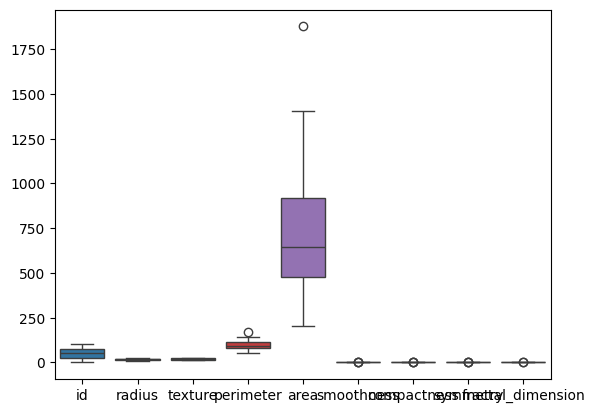

In [36]:
sns.boxplot(df)

In [37]:
df['perimeter']=df['perimeter'].fillna(df['perimeter'].median())

In [38]:
df['smoothness']=df['smoothness'].fillna(df['smoothness'].mean())

In [39]:
df['compactness ']=df['compactness'].fillna(df['compactness'].mean())
df['symmetry']=df['symmetry'].fillna(df['symmetry'].mean())
df['fractal_dimension']=df['fractal_dimension'].fillna(df['fractal_dimension'].mean())

In [40]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              1
perimeter            0
area                 0
smoothness           0
compactness          1
symmetry             0
fractal_dimension    0
compactness          0
dtype: int64

In [41]:
df['compactness']=df['compactness'].fillna(1)

In [42]:
df['texture']=df['texture'].fillna(df['texture'].mean())

In [43]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
compactness          0
dtype: int64

In [44]:
df=df.drop("id",axis=1)

In [45]:
le=LabelEncoder()
df['diagnosis_result']=le.fit_transform(df['diagnosis_result'])

In [46]:
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,compactness
0,1,23,12.0,94.0,954,0.143,0.278,0.242,0.079,0.278
1,0,9,13.0,133.0,1326,0.143,0.079,0.181,0.057,0.079
2,1,21,27.0,130.0,1203,0.125,0.160,0.207,0.060,0.160
3,1,14,16.0,78.0,386,0.070,0.284,0.260,0.097,0.284
4,1,9,19.0,135.0,1297,0.141,0.133,0.181,0.059,0.133
...,...,...,...,...,...,...,...,...,...,...
95,1,23,16.0,132.0,1264,0.091,0.131,0.210,0.056,0.131
96,0,22,14.0,78.0,451,0.105,0.071,0.190,0.066,0.071
97,0,19,27.0,62.0,295,0.102,0.053,0.135,0.069,0.053
98,0,21,24.0,74.0,413,0.090,0.075,0.162,0.066,0.075


In [47]:
x=df.drop("diagnosis_result",axis=1)
y=df['diagnosis_result']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scale=scaler.transform(x_train)
x_test_scale=scaler.transform(x_test)



In [50]:
model=SVC(kernel='rbf')
model.fit(x_train_scale,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
y_predict=model.predict(x_test_scale)

In [54]:
ac=accuracy_score(y_predict,y_test)
print(ac)

0.75
